# **W09 - Hierarchical Clustering**

## **Import Library**

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## **Part A - Data Preprocessing**

### **Load Dataset**

In [161]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [162]:
# Rename the 'Harga Penawaran (dari Owner)' and 'Tingkat/Lantai ' column
df = df.rename(columns={"Harga Penawaran (dari Owner)": "Harga Penawaran", "Tingkat/Lantai ": "Tingkat/Lantai"})
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [163]:
df.shape

(308, 12)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran                308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [165]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


### **Data Cleaning**

In [166]:
df.isna().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran,0
Terjual/Belum,0
Arah Hadap Rumah,0


In [167]:
df[df.duplicated(keep=False)]

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
13,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
14,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
98,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
110,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
257,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil
282,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil


In [168]:
df = df.drop_duplicates(keep='first')

In [169]:
# There are only 305 rows left, because for each set of three duplicate rows, only the first one is kept.
df.shape

(305, 12)

### **Unique Values**

In [170]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [171]:
# Drop 'Terjual/Belum' column
df = df.drop('Terjual/Belum', axis=1)

## **Part B - Exploratory Data Analysis**

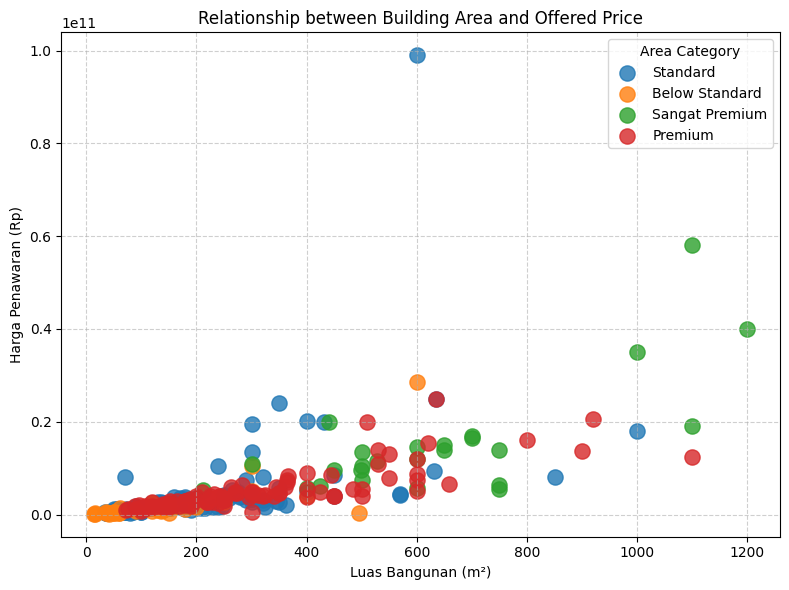

In [172]:
plt.figure(figsize=(8,6))

for category in df["Area Category"].unique():
    subset = df[df["Area Category"] == category]
    plt.scatter(
        subset["Luas Bangunan (m2)"],
        subset["Harga Penawaran"],
        label=category,
        s=120, alpha=0.8
    )

plt.title("Relationship between Building Area and Offered Price")
plt.xlabel("Luas Bangunan (m²)")
plt.ylabel("Harga Penawaran (Rp)")
plt.legend(title="Area Category")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

This plot shows how the Luas Bangunan (building area) relates to the Harga Penawaran (offered price) across different property categories. The upward trend indicates a strong positive correlation: as the building area increases, the property's price also rises significantly. This trend holds true across all categories — Standard, Premium, Sangat Premium, and Below Standard. However, Premium and Sangat Premium properties consistently appear at higher price levels even for similar building sizes, suggesting that location and category prestige add additional value beyond size alone. In short, both building size and property classification are key determinants of property value.

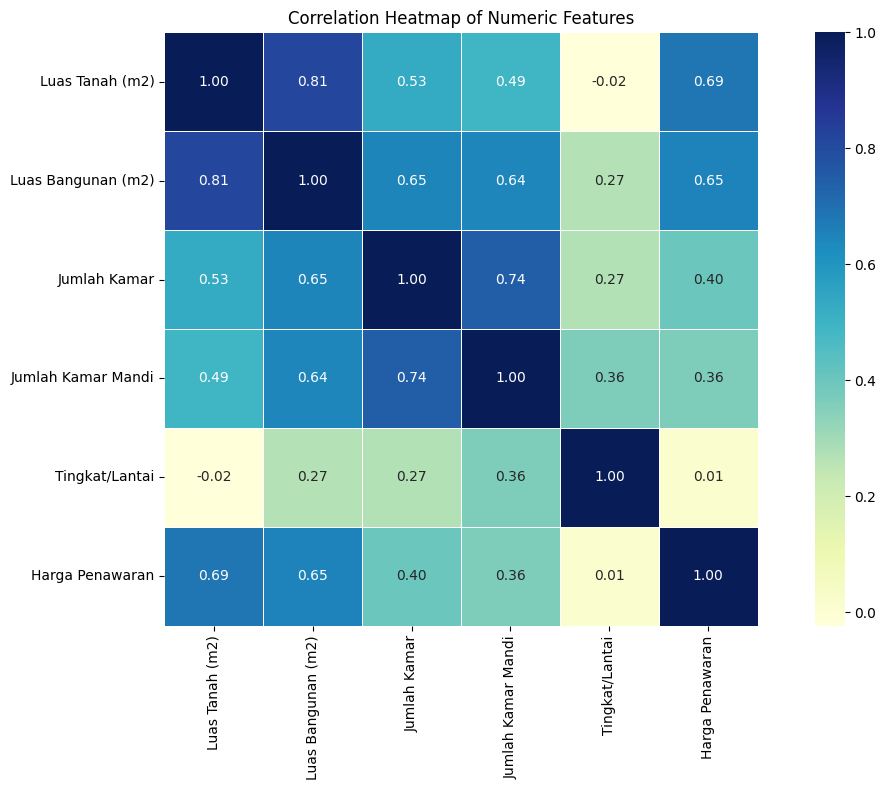

In [173]:
numeric_cols = ["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai", "Harga Penawaran"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

This correlation heatmap illustrates the relationships between key numerical property characteristics, helping us understand which features most influence property prices. The strongest correlation appears between land area (Luas Tanah) and building area (Luas Bangunan) with a coefficient of 0.81, indicating that larger plots typically support larger buildings. Both of these variables also show moderately strong positive correlations with offered price (Harga Penawaran) — 0.69 for land area and 0.65 for building area — suggesting that property size, both in land and structure, plays a major role in determining value.

Meanwhile, the number of bedrooms (Jumlah Kamar) and bathrooms (Jumlah Kamar Mandi) exhibit weaker correlations with price (around 0.36-0.40), meaning these interior features contribute less to price variation compared to overall size. Interestingly, the number of floors (Tingkat/Lantai) has almost no correlation with price (0.01), implying that vertical expansion doesn't necessarily increase property value significantly.

Overall, the heatmap reveals that property pricing is primarily driven by spatial dimensions (land and building area), while other structural characteristics like the number of rooms or floors have relatively minor effects. This insight highlights that in the housing market, bigger land and building sizes are the most influential indicators of a property's market worth.

## **Part C - Data Preparation for Clustering**

### **Feature Encoding**

In [174]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. Ordinal Encoding
area_category_mapping = {'Below Standard': 0, 'Standard': 1, 'Premium': 2, 'Sangat Premium': 3}
df['Area Category'] = df['Area Category'].map(area_category_mapping)

lebar_jalan_depan_rumah_mapping = {'< 1 Mobil': 0, '1-2 Mobil': 1, '> 2 Mobil': 2}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_depan_rumah_mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah']
encoder = OrdinalEncoder()
df[nominal_cols] = encoder.fit_transform(df[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df.sample(n = 5)

{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
                 'Gading Indah Regency': 22,
                 'Galaxy Bumi Permai': 23,
                 'Gayungan': 24,
                 'Gayungsari': 

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
85,1,106.0,275,260,3,2,1,3500000000,3.0,2.0,1
66,1,14.0,97,50,2,1,1,1149000000,0.0,2.0,2
246,2,34.0,200,169,5,4,2,1850000000,1.0,2.0,1
293,2,80.0,120,150,5,4,2,1690000000,1.0,2.0,2
108,2,96.0,84,139,3,2,2,1950000000,3.0,2.0,2


### **Data Transformation**

In [175]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran'])
df_scaled.head()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.060732,0.154902,-0.160064,-0.205482,0.315414,-0.184628
1,-0.977403,-0.967754,-1.380552,-1.434347,0.315414,-0.570059
2,-0.285313,-0.453203,0.450180,0.408950,0.315414,-0.280620
3,-0.201273,-0.078985,0.450180,1.023383,0.315414,-0.232624
4,0.604517,1.558222,0.450180,1.023383,0.315414,-0.004644


In [176]:
# Get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02
mean,-2.329648e-17,4.076885e-17,-1.747236e-16,8.736181e-17,1.164824e-17,5.096106e-17
std,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00
min,-1.056499e+00,-1.182930e+00,-1.990796e+00,-1.434347e+00,-1.647879e+00,-5.853933e-01
25%,-6.511317e-01,-6.870902e-01,-7.703082e-01,-8.199149e-01,3.154143e-01,-4.366063e-01
50%,-3.199173e-01,-3.128714e-01,-1.600640e-01,-2.054824e-01,3.154143e-01,-2.806200e-01
75%,3.177940e-01,3.420114e-01,4.501801e-01,4.089502e-01,3.154143e-01,-1.664307e-02
max,6.591094e+00,4.364863e+00,5.332133e+00,5.938843e+00,4.242001e+00,1.127437e+01


### **Silhouette Score with Different Clustering Parameters**

Skipping Ward linkage with Manhattan metric (not supported).


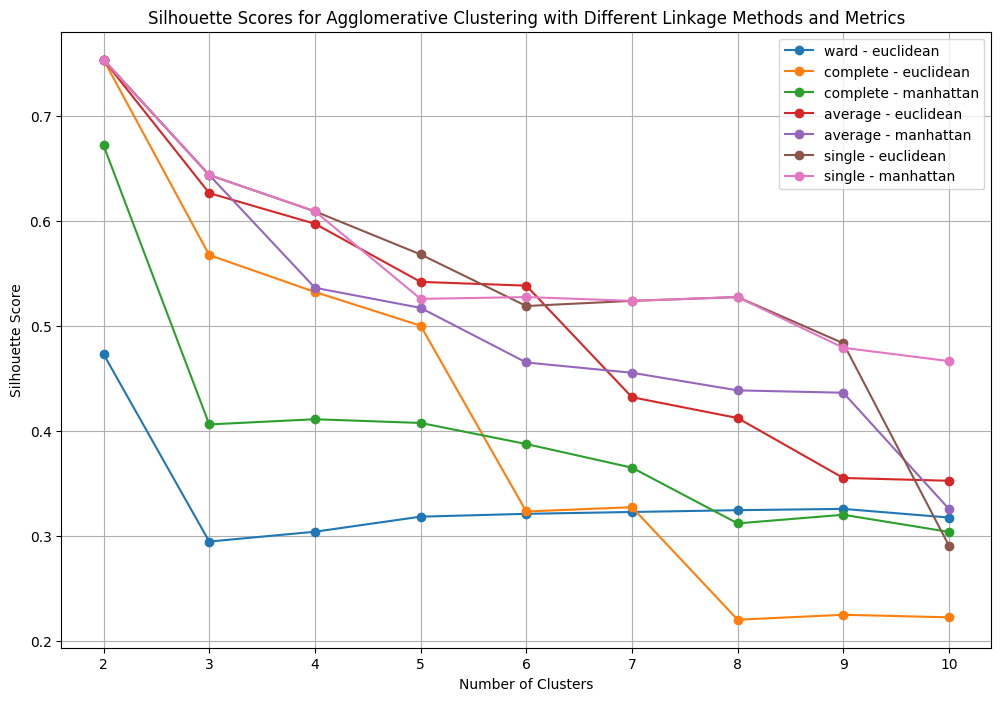

Best Silhouette Score: 0.7533138555676027
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [177]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## **Part D - Hierarchical Clustering Modeling**

### **Hierarchical Clustering Models**

**Model 1: Best Combination**

In [178]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [179]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7533138555676027


**Model 2: Ward Linkage**

In [180]:
# Hierarchical Clustering
aggloWard = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc_ward = aggloWard.fit_predict(df_scaled)

In [181]:
# Evaluation
ss_ward = silhouette_score(df_scaled, y_hc_ward)
print(ss_ward)

0.47292973260268667


### **Dendogram Visualization**

**Model 1: Best Combination**

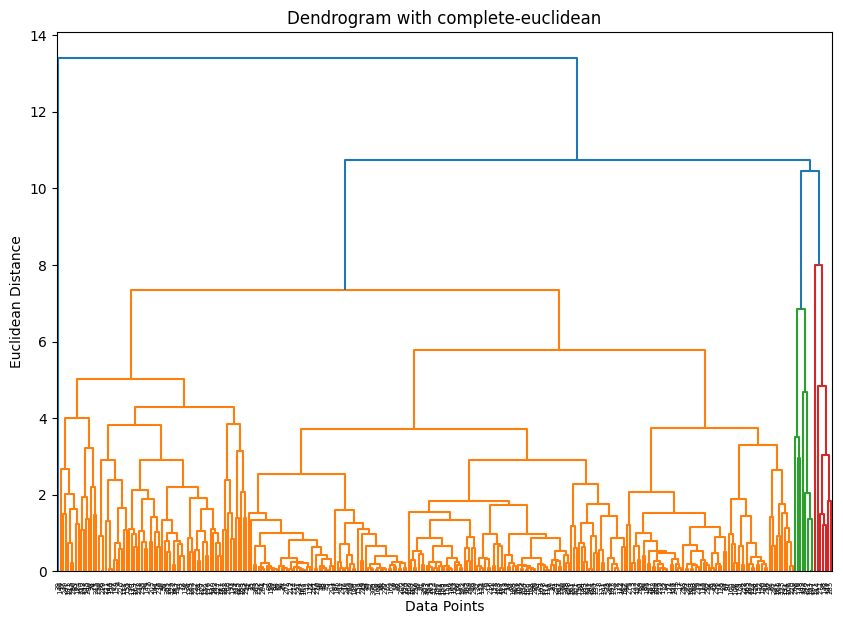

In [182]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Model 2: Ward Linkage**

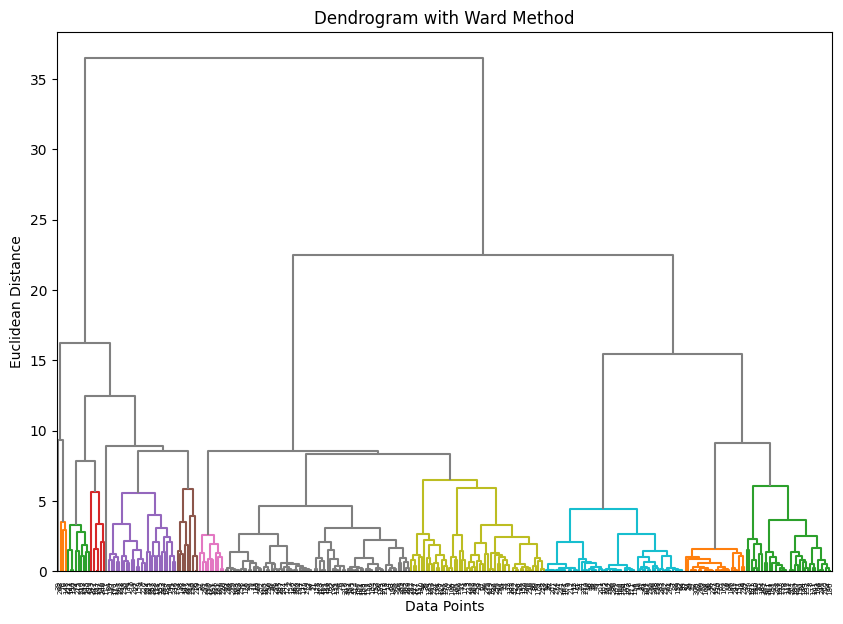

In [183]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### **Merge with the Original Data**

In [184]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc
df['Agglo_Ward'] = y_hc_ward

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo,Agglo_Ward
0,1,11.0,240,300,4,3,2,3500000000,3.0,2.0,1,0,0
1,0,100.0,30,60,2,1,2,287799000,3.0,2.0,0,0,0
2,1,48.0,170,170,5,4,2,2699999999,1.0,0.0,1,0,0
3,3,48.0,187,250,5,5,2,3100000000,3.0,2.0,1,0,0
4,2,48.0,350,600,5,5,2,5000000000,0.0,2.0,1,0,1


## **Part E - Comparison & Interpretation**

### **Distribution of Data Points per Cluster**

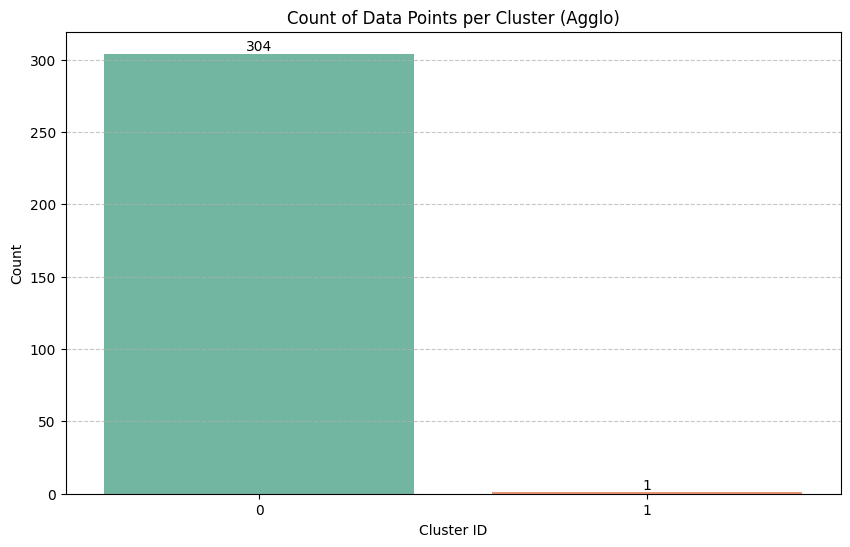

In [185]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

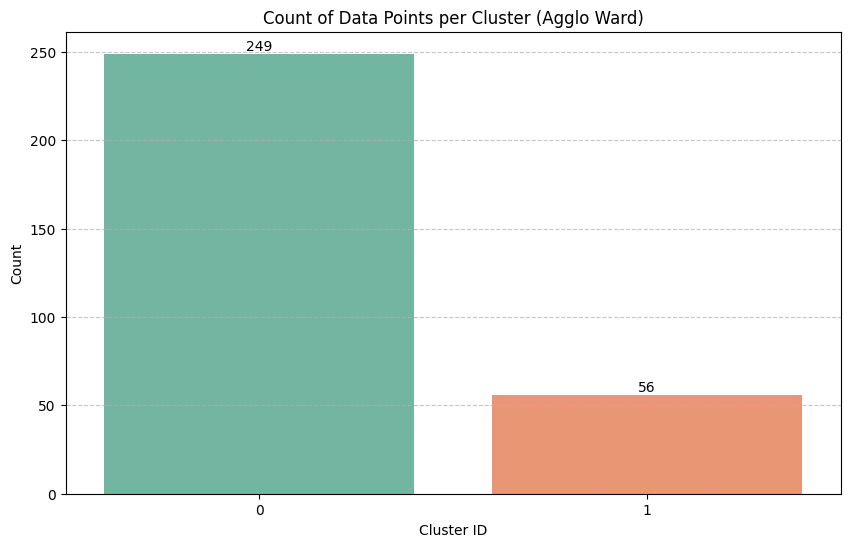

In [186]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Ward'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Ward)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In the first chart (Complete linkage), the clustering is highly unbalanced, with one cluster (Cluster 0) containing 304 data points, while the other (Cluster 1) contains only 1 data point. This indicates that the Complete linkage method, which considers the maximum distance between points when merging clusters, tends to isolate outliers and create one dominant cluster encompassing most of the data.

In contrast, the second chart (Ward linkage) produces a more balanced distribution — 249 data points in Cluster 0 and 56 in Cluster 1. Ward's method minimizes the variance within clusters, leading to more compact and evenly sized groups. Overall, the Ward method provides a more meaningful clustering structure in this case, while the Complete linkage result suggests poor separation or a dataset dominated by one dense group and a few outliers.

### **Statistical Summary**

In [189]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'median'],
    'Luas Bangunan (m2)': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah (ROW)': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah       Luas Tanah (m2)        Luas Bangunan (m2)         \
               mode count            mean median               mean median   
cluster                                                                      
0              11.0   304      226.490132  162.5         265.789474  200.0   
1              30.0     1      600.000000  600.0         600.000000  600.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
cluster                                                                       
0           4.253289    4.0           3.328947    3.0       1.842105    2.0   
1           7.000000    7.0           5.000000    5.0       1.000000    1.0   

        Area Category       Lebar Jalan Depan Rumah (ROW)       Posisi Rumah  \
                 mode count                          mode count         mode   
cluster                                                                        
0                   1   304                             1   304          2.0   
1                   1     1                             1     1          2.0   

              Arah Hadap Rumah        
        count             mode count  
cluster                               
0         304              3.0   304  
1           1              0.0     1

In [188]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_ward).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'median'],
    'Luas Bangunan (m2)': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah (ROW)': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah       Luas Tanah (m2)        Luas Bangunan (m2)         \
               mode count            mean median               mean median   
cluster                                                                      
0              11.0   249      155.935743  136.0         187.196787  170.0   
1              48.0    56      546.875000  464.5         621.214286  600.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
cluster                                                                       
0           3.831325    4.0           2.903614    3.0       1.807229    2.0   
1           6.178571    6.0           5.250000    5.0       1.982143    2.0   

        Area Category       Lebar Jalan Depan Rumah (ROW)       Posisi Rumah  \
                 mode count                          mode count         mode   
cluster                                                                        
0                   1   249                             1   249          2.0   
1                   2    56                             1    56          2.0   

              Arah Hadap Rumah        
        count             mode count  
cluster                               
0         249              3.0   249  
1          56              0.0    56

Comparing the two clustering results, we can see a clear difference in how the Complete linkage and Ward linkage methods segment the data. In the Complete linkage model, the segmentation is extremely unbalanced, with Cluster 0 containing 304 data points and Cluster 1 only one data point. This indicates that the Complete method essentially grouped almost all observations together and treated a single property as an outlier. The summary statistics show minimal variation between clusters, meaning the Complete linkage failed to uncover meaningful subgroups — instead, it mostly reflects one dominant cluster with a single exception.

In contrast, the Ward linkage method produced a much more balanced and interpretable segmentation, with 249 data points in Cluster 0 and 56 in Cluster 1. Cluster 1 clearly represents higher-end properties — having larger land area, building size, number of rooms, and bathrooms — while Cluster 0 includes smaller and more modest properties. This suggests that Ward's method successfully differentiated the data into two distinct market segments, likely corresponding to standard housing versus premium or luxury properties.

Overall, the Ward method provides a more meaningful and interpretable segmentation, as it minimizes within-cluster variance and captures distinct differences in property characteristics, while the Complete method results in an overly skewed and less informative clustering structure.

### **Managerial Interpretation & Potential Business Implications**

The Ward method is the better clustering model in this property analysis because it creates balanced, well-separated, and meaningful segments by minimizing variance within clusters. Unlike other methods that produce skewed or less interpretable groupings, Ward linkage clearly distinguishes between affordable, medium-sized homes and larger, premium properties, reflecting real market differences. This makes the results more actionable for managers, enabling targeted strategies such as affordable housing promotions for mass buyers and premium branding for high-end investors. In short, Ward’s method provides both statistical validity and strategic business insight, making it ideal for property market segmentation.

### **🏘 Cluster 0 (n = 249) — Compact Residential Segment: Moderate-Sized, Affordable Homes**

**Profil:**

*   Rata-rata Luas Tanah ± 156 m², Luas Bangunan ± 188 m²
*   3-4 kamar tidur, 2-3 kamar mandi, 1-2 lantai
*   Harga dan ukuran cenderung moderat
*   Mayoritas berada di area kategori 2 (lebih padat dan ekonomis)

**Makna:**

Segmen ini mewakili pasar utama perumahan menengah ke bawah, cocok untuk keluarga muda atau pembeli rumah pertama yang mencari keseimbangan antara harga dan kenyamanan. Properti di segmen ini kemungkinan besar berada di kawasan padat atau pinggiran kota dengan akses jalan standar.

**Strategi:**

*   Produk: Fokus pada rumah siap huni dengan ukuran efisien dan harga terjangkau.
*   Promosi: Gunakan pesan seperti “rumah ideal untuk keluarga muda” atau “investasi hunian pertama”.
*   Distribusi: Perkuat kerja sama dengan agen lokal, promosi di platform properti daring.

**Fokus KPI:**

Unit sold rate, average days on market, lead-to-sale conversion rate.

### **🏡 Cluster 1 (n = 56) — Premium Property Segment: Large, High-Value Residences**

**Profil:**

*   Luas Tanah ± 547 m², Luas Bangunan ± 621 m²
*   6-7 kamar tidur, 5 kamar mandi, ± 2 lantai
*   Berada di area kategori 2 (dengan lebar jalan besar dan posisi rumah strategis)

**Makna:**

Segmen ini adalah pasar properti menengah atas hingga mewah, ditujukan bagi pembeli mapan atau investor. Properti berukuran besar dengan fasilitas lengkap menunjukkan orientasi pada kenyamanan, privasi, dan nilai investasi jangka panjang.

**Strategi:**

*   Produk: Tawarkan fitur premium (halaman luas, garasi besar, keamanan 24 jam).
*   Promosi: Fokus pada value investment, gaya hidup eksklusif, dan potensi kenaikan nilai properti.
*   Distribusi: Gunakan agen properti khusus high-end dan media visual berkualitas tinggi (video tour, drone view).

**Fokus KPI:**

Gross profit per unit, premium property turnover, high-value buyer acquisition rate.

### **📊 Rekomendasi Umum (Property Market Insights)**

**Segmentasi Pasar:**

*   Cluster 0: Kategori mass market housing → produk inti dan high-turnover.
*   Cluster 1: Kategori luxury housing → volume rendah tapi margin tinggi.

**Strategi Bisnis:**



*   Gunakan strategi harga diferensial: skema KPR fleksibel untuk Cluster 0, dan paket investasi atau sewa premium untuk Cluster 1.
*   Pemasaran digital terarah: Cluster 0 → iklan di marketplace properti dan media sosial. Cluster 1 → kampanye personal melalui private viewing dan CRM eksklusif.

*   Pemantauan pasar: Lakukan evaluasi tiap 6 bulan untuk mengidentifikasi pergeseran dari segmen menengah → atas (upgrade buyer).